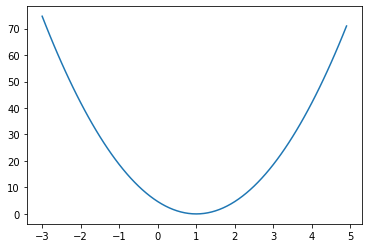

In [6]:
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
#matplotlib은 설치가 안된 경우 설치하도록 하자. 나의 경우 아나콘다에 내장되어 있었음
tf.disable_v2_behavior()

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)
#왜 placeholder를 사용하는가? : 사용자가 직접 W의 값을 바꿔가면서 변화를 보기 위해서

hypothesis = X * W

#cost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess = tf.Session()

sess.run(tf.global_variables_initializer())

#variables for plotting cost function
#W와 cost의 값을 저장할 리스트를 만들어주자
W_val = []
cost_val = []

for i in range (-30, 50) :
    feed_W = i * 0.1        #i에 0.1을 곱하는 것 = -3 ~ 5까지 0.1 간격으로 i를 움직이겠다는 것
    curr_cost, curr_W = sess.run([cost, W], feed_dict = {W : feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    #대입되는 순서에 유의하자!

#Show the cost function
plt.plot(W_val, cost_val) #그래프를 그리는 코드! 괄호 안은 순서대로 x축, y축을 의미)
plt.show()

In [5]:
#그래프를 만들었으니 정확한 W값을 찾아보자
#Gradient descent algorithm을 사용
#해당 알고리즘을 코드로 구현하는 것.
#미분 : 한 점에서의 기울기를 구하기 위해 사용
import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name = 'weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))

#Minimize: Gradient Descent using derivative: W -= Learning_rate * derivative
#cost함수를 미분해서 대입한 W수식을 코드로 표현한 부분
#alpha 부분은 learning rate, 미분된 cost 부분(=기울기)은 gradient
#descent(감소)를 위해 기존의 W 값에서 learning rate * gradient 해주기
#마지막으로 구해진 descent 값을 assign해서 update 해주기
learning_rate = 0.1
gradient = tf.reduce_mean((W*X-Y)*X)
descent = W - learning_rate * gradient
update = W.assign(descent)
#나중에 graph에서 'update'를 하면 위의 과정들이 실행될 것!

#launch the graph in a session
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={X : x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))
    
#결과값에서 W가 점점 1로 수렴하는 것을 확인 가능.
#해당 코드는 알고리즘 구현 과정을 코드로 나타내본 것.

0 0.27656278 [1.2434409]
1 0.07866675 [1.1298351]
2 0.022376373 [1.0692455]
3 0.0063648243 [1.0369309]
4 0.0018104383 [1.0196965]
5 0.00051497715 [1.0105048]
6 0.00014648249 [1.0056026]
7 4.1667463e-05 [1.0029881]
8 1.1853285e-05 [1.0015937]
9 3.371367e-06 [1.00085]
10 9.590267e-07 [1.0004534]
11 2.7274882e-07 [1.0002418]
12 7.763928e-08 [1.000129]
13 2.2095364e-08 [1.0000688]
14 6.2911263e-09 [1.0000367]
15 1.7836707e-09 [1.0000196]
16 4.9948784e-10 [1.0000104]
17 1.4032746e-10 [1.0000055]
18 4.2163606e-11 [1.000003]
19 1.1581847e-11 [1.0000015]
20 3.0553338e-12 [1.0000008]


In [12]:
#Output when W = 5

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(5.0)

hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(100) :
    print(step, sess.run(W))
    sess.run(train)

0 5.0
10 1.0
20 1.0
30 1.0
40 1.0
50 1.0
60 1.0
70 1.0
80 1.0
90 1.0
99 1.0


In [9]:
#output when W = -3

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(-3.0)

hypothesis = X * W

cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(100) :
    if step % 10 == 0 or step == 99:
        print(step, sess.run(W))
    sess.run(train)

0 -3.0
10 1.0
20 1.0
30 1.0
40 1.0
50 1.0
60 1.0
70 1.0
80 1.0
90 1.0
99 1.0


In [11]:
#option 코드
X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(5.)

hypothesis = X * W

#우리가 수식으로 계산한 gradient
gradient = tf.reduce_mean((W*X-Y)*X)*2


cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)    #자동으로 계산된 gradient

#두 가지 종류의 gradient는 같은 값을 가질까?
gvs = optimizer.compute_gradients(cost,[W])    #optimizer에서 cost에 맞는 gradient를 계산해주는 코드. 

apply_gradients = optimizer.apply_gradients(gvs)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100) :
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradients)

0 [37.333332, 5.0, [(37.333336, 5.0)]]
1 [2.4888866, 1.2666664, [(2.4888866, 1.2666664)]]
2 [0.1659259, 1.0177778, [(0.1659259, 1.0177778)]]
3 [0.011061668, 1.0011852, [(0.011061668, 1.0011852)]]
4 [0.00073742867, 1.000079, [(0.00073742867, 1.000079)]]
5 [4.895528e-05, 1.0000052, [(4.8955284e-05, 1.0000052)]]
6 [3.0994415e-06, 1.0000004, [(3.0994415e-06, 1.0000004)]]
7 [0.0, 1.0, [(0.0, 1.0)]]
8 [0.0, 1.0, [(0.0, 1.0)]]
9 [0.0, 1.0, [(0.0, 1.0)]]
10 [0.0, 1.0, [(0.0, 1.0)]]
11 [0.0, 1.0, [(0.0, 1.0)]]
12 [0.0, 1.0, [(0.0, 1.0)]]
13 [0.0, 1.0, [(0.0, 1.0)]]
14 [0.0, 1.0, [(0.0, 1.0)]]
15 [0.0, 1.0, [(0.0, 1.0)]]
16 [0.0, 1.0, [(0.0, 1.0)]]
17 [0.0, 1.0, [(0.0, 1.0)]]
18 [0.0, 1.0, [(0.0, 1.0)]]
19 [0.0, 1.0, [(0.0, 1.0)]]
20 [0.0, 1.0, [(0.0, 1.0)]]
21 [0.0, 1.0, [(0.0, 1.0)]]
22 [0.0, 1.0, [(0.0, 1.0)]]
23 [0.0, 1.0, [(0.0, 1.0)]]
24 [0.0, 1.0, [(0.0, 1.0)]]
25 [0.0, 1.0, [(0.0, 1.0)]]
26 [0.0, 1.0, [(0.0, 1.0)]]
27 [0.0, 1.0, [(0.0, 1.0)]]
28 [0.0, 1.0, [(0.0, 1.0)]]
29 [0.0, 1.0, [(0